In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
df = pd.read_csv("superstore_data.csv")

In [4]:
df["Response"].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [5]:
LABELS = ["No entra", "Entra en el Programa"]
def mostrar_resultados(Y_test, pred_Y):
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(Y_test, pred_Y)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS,
                annot=True, fmt="d");
    plt.title("Matriz de Confusión")
    plt.ylabel('Resultado Real')
    plt.xlabel('Resultado predicho')
    plt.show()

In [6]:
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [9]:
hoy = datetime.now()
df['TimeClient'] = (hoy - df['Dt_Customer']).dt.days

In [10]:
df = df.drop('Dt_Customer', axis=1)

In [11]:
df_dummies_col1 = pd.get_dummies(df['Education'], prefix='Education')
df_dummies_col2 = pd.get_dummies(df['Marital_Status'], prefix='MarStts')

In [12]:
df = pd.concat([df, df_dummies_col1, df_dummies_col2], axis=1)

In [13]:
df = df.drop(['Education', 'Marital_Status'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2216 non-null   int64  
 1   Year_Birth            2216 non-null   int64  
 2   Income                2216 non-null   float64
 3   Kidhome               2216 non-null   int64  
 4   Teenhome              2216 non-null   int64  
 5   Recency               2216 non-null   int64  
 6   MntWines              2216 non-null   int64  
 7   MntFruits             2216 non-null   int64  
 8   MntMeatProducts       2216 non-null   int64  
 9   MntFishProducts       2216 non-null   int64  
 10  MntSweetProducts      2216 non-null   int64  
 11  MntGoldProds          2216 non-null   int64  
 12  NumDealsPurchases     2216 non-null   int64  
 13  NumWebPurchases       2216 non-null   int64  
 14  NumCatalogPurchases   2216 non-null   int64  
 15  NumStorePurchases     2216

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [16]:
x = df.drop(["Response"], axis=1)
y = df.Response

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42, shuffle=True)

In [18]:
gb = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=10001, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [19]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=10001)

In [20]:
probabilidades_prediccion = gb.predict_proba(X_test)

In [21]:
predict_prob = probabilidades_prediccion[:, 1]

In [22]:
predict = predict_prob >= 0.1

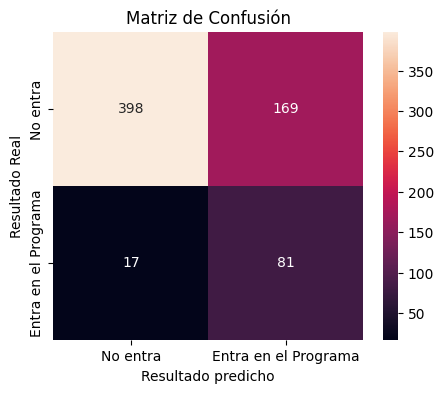

In [23]:
mostrar_resultados(y_test, predict)

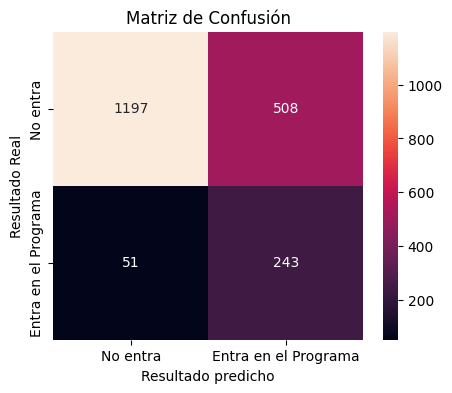

In [24]:
confusion_matrix = [[1197, 508], [51, 243]]
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS,
            annot=True, fmt="d");
plt.title("Matriz de Confusión")
plt.ylabel('Resultado Real')
plt.xlabel('Resultado predicho')
plt.show()